<a href="https://colab.research.google.com/github/sagawritescode/ERA-V1/blob/main/Assignment7Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Cuda

In [2]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


Transforms

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

Download Data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 425118215.55it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25905837.00it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 176304366.80it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18993548.12it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Load test and train data using dataloader

In [5]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Plot the images

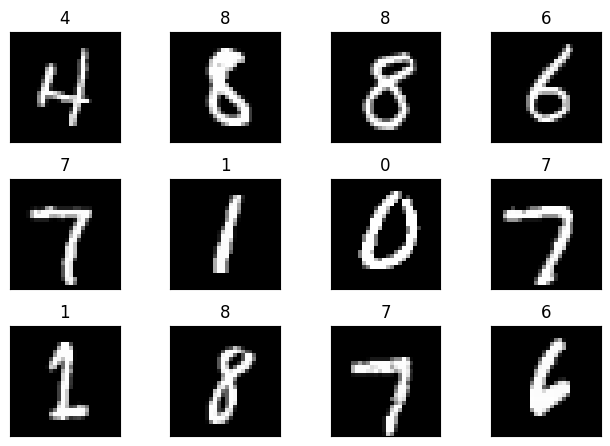

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

Initialising and summarising model

In [7]:
!pip install torchsummary
from torchsummary import summary
from model import Model3
from utils import train, test

training_model = Model3().to(device)
summary(training_model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           1,440
              ReLU-6           [-1, 16, 22, 22]               0
            Conv2d-7           [-1, 10, 22, 22]             160
              ReLU-8           [-1, 10, 22, 22]               0
         MaxPool2d-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 10, 9, 9]             900
             ReLU-11             [-1, 10, 9, 9]               0
           Conv2d-12             [-1, 16, 7, 7]           1,440
    

In [8]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []


CODE BLOCK: 10

In [9]:
optimizer = optim.SGD(training_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(training_model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(training_model, device, test_loader, criterion, test_acc, test_losses)
  # train(training_model, device, train_loader, optimizer, epoch)
  # test(training_model, device, test_loader)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3025 Batch_id=468 Accuracy=13.03: 100%|██████████| 469/469 [00:19<00:00, 23.71it/s]


Test set: Average loss: 2.3025, Accuracy: 1232/10000 (12.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.3022 Batch_id=468 Accuracy=11.67: 100%|██████████| 469/469 [00:20<00:00, 22.79it/s]


Test set: Average loss: 2.3023, Accuracy: 1150/10000 (11.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.2987 Batch_id=468 Accuracy=11.33: 100%|██████████| 469/469 [00:19<00:00, 24.44it/s]


Test set: Average loss: 2.3004, Accuracy: 1147/10000 (11.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2838 Batch_id=468 Accuracy=55.37: 100%|██████████| 469/469 [00:17<00:00, 26.67it/s]


Test set: Average loss: 0.2468, Accuracy: 9234/10000 (92.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0707 Batch_id=468 Accuracy=93.90: 100%|██████████| 469/469 [00:16<00:00, 28.42it/s]


Test set: Average loss: 0.1363, Accuracy: 9605/10000 (96.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.2010 Batch_id=468 Accuracy=96.14: 100%|██████████| 469/469 [00:16<00:00, 28.31it/s]


Test set: Average loss: 0.1040, Accuracy: 9698/10000 (96.98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0714 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:17<00:00, 27.53it/s]


Test set: Average loss: 0.0816, Accuracy: 9758/10000 (97.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0115 Batch_id=468 Accuracy=97.59: 100%|██████████| 469/469 [00:17<00:00, 26.85it/s]


Test set: Average loss: 0.0795, Accuracy: 9761/10000 (97.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0571 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:16<00:00, 28.62it/s]


Test set: Average loss: 0.0783, Accuracy: 9757/10000 (97.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0413 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:18<00:00, 25.55it/s]


Test set: Average loss: 0.0760, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0800 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:16<00:00, 28.46it/s]


Test set: Average loss: 0.0749, Accuracy: 9776/10000 (97.76%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1192 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:17<00:00, 27.57it/s]


Test set: Average loss: 0.0733, Accuracy: 9775/10000 (97.75%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0916 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:16<00:00, 28.52it/s]


Test set: Average loss: 0.0715, Accuracy: 9780/10000 (97.80%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.1412 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:16<00:00, 28.33it/s]


Test set: Average loss: 0.0716, Accuracy: 9777/10000 (97.77%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0606 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:16<00:00, 28.79it/s]


Test set: Average loss: 0.0714, Accuracy: 9778/10000 (97.78%)

Adjusting learning rate of group 0 to 1.0000e-04.


CODE BLOCK: 11

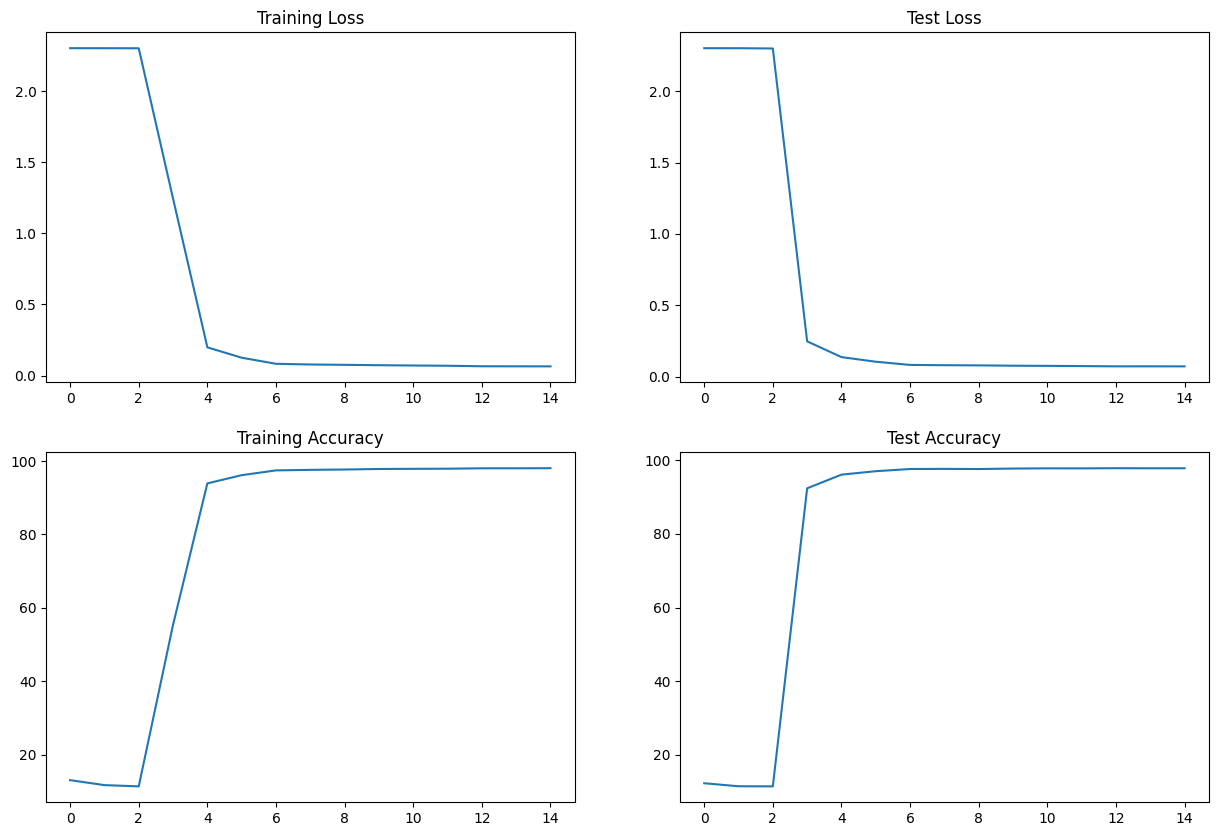

In [10]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)